In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, count, when
import matplotlib.pyplot as plt
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from pyspark.sql.functions import countDistinct
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("E-Shop Analysis") \
    .getOrCreate()


In [2]:
# Read data into DataFrame
df = spark.read.csv("/home/jovyan/e-shop clothing 2008.csv", header=True, sep=";")

In [3]:
# Read data into DataFrame
#df = spark.read.csv("/mnt/group-12-pvc/e-shop clothing 2008.csv", header=True, sep=";")

In [4]:
# Count distinct values in each column
from pyspark.sql.functions import col
distinct_counts = df.select(*(col(c).alias(c + '_distinct_count') for c in df.columns)).count()
print("Distinct counts of each column:")
print(distinct_counts)

Distinct counts of each column:
165474


In [5]:
from pyspark.sql.functions import col, count, when

# Check for missing values
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()
print("Missing values:")
print(missing_values)
print(type(missing_values))

Missing values:
   year  month  day  order  country  session ID  page 1 (main category)  \
0     0      0    0      0        0           0                       0   

   page 2 (clothing model)  colour  location  model photography  price  \
0                        0       0         0                  0      0   

   price 2  page  
0        0     0  
<class 'pandas.core.frame.DataFrame'>


In [6]:
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()
print(type(missing_values))

+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+
|year|month|day|order|country|session ID|page 1 (main category)|page 2 (clothing model)|colour|location|model photography|price|price 2|page|
+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+
|   0|    0|  0|    0|      0|         0|                     0|                      0|     0|       0|                0|    0|      0|   0|
+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+

<class 'pyspark.sql.dataframe.DataFrame'>


In [7]:
from pyspark.sql.functions import col

# Convert 'month' column to integer
df = df.withColumn('year', col('year').cast('integer'))
df = df.withColumn('month', col('month').cast('integer'))
df = df.withColumn('day', col('day').cast('integer'))
df = df.withColumn('order', col('order').cast('integer'))
df = df.withColumn('session ID', col('session ID').cast('integer'))
df = df.withColumn('page 1 (main category)', col('page 1 (main category)').cast('integer'))
df = df.withColumn('page2 (clothing model)', col('page 2 (clothing model)').cast('integer'))
df = df.withColumn('colour', col('colour').cast('integer'))
df = df.withColumn('location', col('location').cast('integer'))
df = df.withColumn('model photography', col('model photography').cast('integer'))
df = df.withColumn('price', col('price').cast('integer'))
df = df.withColumn('price 2', col('price 2').cast('integer'))
df = df.withColumn('page', col('page').cast('integer'))
df = df.withColumn('country', col('country').cast('integer'))
#df = df.withColumn('page2_INDEX', col('page2_INDEX').cast('integer'))

In [8]:
# Show schema of DataFrame
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- order: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- session ID: integer (nullable = true)
 |-- page 1 (main category): integer (nullable = true)
 |-- page 2 (clothing model): string (nullable = true)
 |-- colour: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- model photography: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- price 2: integer (nullable = true)
 |-- page: integer (nullable = true)
 |-- page2 (clothing model): integer (nullable = true)



In [9]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

#

# Assuming your data is loaded into a DataFrame named 'df'
# 1. Data Preprocessing
# Handle missing values (if any)

# 2. Feature Selection/Extraction (Optional)

# 3. Normalization/Scaling
# Assemble features into a vector
feature_cols = ['price']#, 'page 1 (main category)']#, 'page2_INDEX', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# 4. Choose a Clustering Algorithm
# Initialize K-means model
kmeans = KMeans(featuresCol="features", k=3, seed=42)

# 5. Train the Clustering Model
model = kmeans.fit(df_assembled)

# 6. Evaluate Cluster Quality (Optional)
# Silhouette score, Davies-Bouldin index, etc.

# 7. Interpretation and Analysis
# Analyze resulting clusters
centers = model.clusterCenters()
for center in centers:
    print(center)



[29.32766299]
[60.21853424]
[42.00795738]


In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

#clusteruing with only price feature

# 3. Normalization/Scaling
# Assemble features into a vector
feature_cols = ['price']#, 'page 1 (main category)']#, 'page2_INDEX', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# 4. Choose a Clustering Algorithm
# Initialize K-means model
kmeans = KMeans(featuresCol="features", k=3, seed=35)

# 5. Train the Clustering Model
model = kmeans.fit(df_assembled)

# 6. Evaluate Cluster Quality (Optional)
# Silhouette score, Davies-Bouldin index, etc.

# 7. Interpretation and Analysis
# Analyze resulting clusters
centers = model.clusterCenters()
for center in centers:
    print(center)

[33.12199941]
[46.51770208]
[62.25980353]


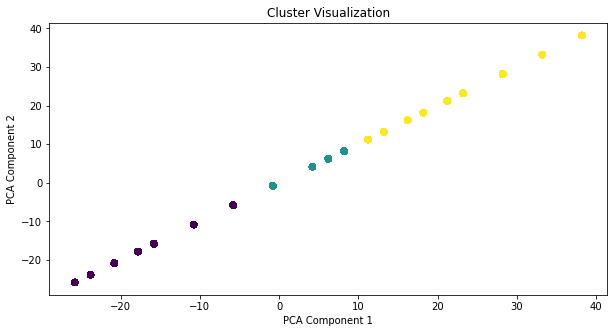

In [13]:
# Assuming you have matplotlib and pandas imported
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
df_pd = df_assembled.select("features").toPandas()

# Plot clusters in 2D using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_pd['features'].tolist())
df_pd['pca-one'] = pca_result[:,0]
df_pd['pca-two'] = pca_result[:,0]

plt.figure(figsize=(10,5))
plt.scatter(df_pd['pca-one'], df_pd['pca-two'], c=model.transform(df_assembled).select('prediction').toPandas()['prediction'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()


In [44]:
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn.metrics import silhouette_samples
import numpy as np
from sklearn.metrics import silhouette_score



# Apply the clustering model to the assembled DataFrame to get cluster labels
cluster_labels = model.transform(df_assembled).select('prediction').rdd.map(lambda x: x[0]).collect()

# Convert the DataFrame to a Pandas DataFrame for evaluation
df_assembled_pd = df_assembled.select("features").toPandas()

# Convert features to a numpy array
X = np.array(df_assembled_pd['features'].apply(lambda x: x.toArray()).tolist())

# Evaluate cluster quality using silhouette score
silhouette = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.5946518064508632


In [14]:
# Examine cluster centers
centers = model.clusterCenters()
for i, center in enumerate(centers):
    print(f"Cluster {i+1} Center:")
    for j, value in enumerate(center):
        print(f"Feature {feature_cols[j]}: {value}")

Cluster 1 Center:
Feature price: 33.121999406014744
Cluster 2 Center:
Feature price: 46.51770208399116
Cluster 3 Center:
Feature price: 62.259803527931695


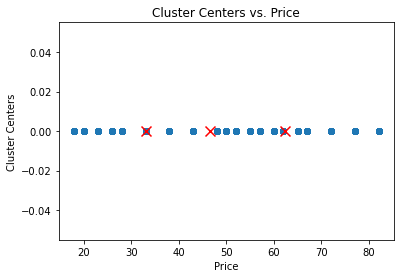

In [15]:
import matplotlib.pyplot as plt

# Plot only the "price" feature
plt.scatter(df_assembled.select("price").toPandas()["price"], [0] * df_assembled.count(), alpha=0.5)  # Assuming a zero value for the y-coordinate
for center in centers:
    plt.scatter(center[0], 0, marker="x", color="red", s=100)  # Plotting cluster centers on the same y-coordinate

plt.xlabel("Price")
plt.ylabel("Cluster Centers")
plt.title("Cluster Centers vs. Price")
plt.show()



In [17]:
# 5. Train the Clustering Model
model = kmeans.fit(df_assembled)

# 6. Predict cluster labels
predictions = model.transform(df_assembled)

# 7. Store the cluster labels in a new column named 'prediction'
predictions = predictions.withColumnRenamed("prediction", "cluster")

# Show the DataFrame with cluster labels
predictions.show()


+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+----------------------+--------+-------+
|year|month|day|order|country|session ID|page 1 (main category)|page 2 (clothing model)|colour|location|model photography|price|price 2|page|page2 (clothing model)|features|cluster|
+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+----------------------+--------+-------+
|2008|    4|  1|    1|     29|         1|                     1|                    A13|     1|       5|                1|   28|      2|   1|                  null|  [28.0]|      0|
|2008|    4|  1|    2|     29|         1|                     1|                    A16|     1|       6|                1|   33|      2|   1|                  null|  [33.0]|      0|
|2008|    4|  1|    3|     29|         1|                     2|                     B4|  

In [18]:
from pyspark.sql.functions import col

# Filter data for the current cluster (replace 0 with the desired cluster number)
cluster_data = predictions.filter(predictions['cluster'] == 1)

# Select the features you want to see
selected_features = cluster_data.select(
    col('order'), col('country'), col('price'), col('page 1 (main category)'), 
    col('colour'), col('location'), col('model photography')
)

# Show the selected features for the current cluster
selected_features.show()


+-----+-------+-----+----------------------+------+--------+-----------------+
|order|country|price|page 1 (main category)|colour|location|model photography|
+-----+-------+-----+----------------------+------+--------+-----------------+
|    3|     29|   52|                     2|    10|       2|                1|
|    5|     29|   52|                     2|     4|       3|                2|
|    9|     29|   48|                     4|     6|       4|                2|
|    9|     29|   48|                     4|     9|       6|                2|
|   10|     29|   43|                     4|     9|       5|                1|
|    2|     21|   48|                     3|     4|       2|                1|
|    3|     21|   48|                     3|    13|       3|                1|
|    5|     21|   48|                     3|    14|       6|                1|
|    6|     21|   43|                     4|     7|       2|                1|
|    3|     21|   48|                     3|     4| 

+-----+-------+-----+----------------------+------+--------+-----------------+
|order|country|price|page 1 (main category)|colour|location|model photography|
+-----+-------+-----+----------------------+------+--------+-----------------+
|    6|     29|   57|                     3|     6|       1|                2|
|    1|     29|   57|                     2|     9|       5|                1|
|    2|     29|   67|                     2|    12|       1|                1|
|    3|     29|   57|                     2|    11|       2|                1|
|    4|     29|   57|                     2|     2|       3|                1|
|    7|     29|   57|                     2|     2|       3|                1|
|    2|     21|   62|                     1|     2|       1|                1|
|    1|      9|   57|                     3|    14|       1|                1|
|    5|      9|   57|                     2|    13|       3|                1|
|    1|     29|   62|                     1|     3| 

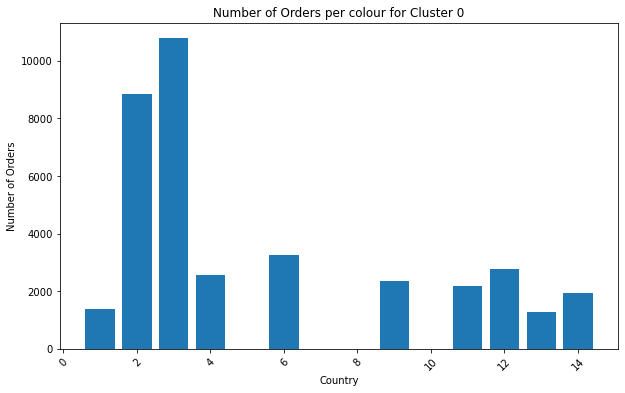

In [19]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter data for the current cluster (replace 0 with the desired cluster number)
cluster_data = predictions.filter(predictions['cluster'] == 2)

# Select the features you want to see
selected_features = cluster_data.select(
    col('order'), col('country'), col('price'), col('page 1 (main category)'), 
    col('colour'), col('location'), col('model photography')
)

# Show the selected features for the current cluster
selected_features.show()
# Group by country and count the number of orders
order_counts = selected_features.groupBy('colour').count().orderBy('count', ascending=False)

# Convert DataFrame to Pandas for plotting
order_counts_pd = order_counts.toPandas()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(order_counts_pd['colour'], order_counts_pd['count'])
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per colour for Cluster 0')
plt.xticks(rotation=45)
plt.show()


+-----+-------+-----+----------------------+------+--------+-----------------+
|order|country|price|page 1 (main category)|colour|location|model photography|
+-----+-------+-----+----------------------+------+--------+-----------------+
|    1|     29|   28|                     1|     1|       5|                1|
|    2|     29|   33|                     1|     1|       6|                1|
|    4|     29|   38|                     2|     6|       6|                2|
|    7|     29|   33|                     3|     5|       1|                2|
|    8|     29|   38|                     4|     9|       5|                1|
|    5|     29|   38|                     1|     3|       4|                1|
|    6|     29|   38|                     1|     3|       4|                1|
|    8|     29|   38|                     4|     3|       1|                1|
|    1|     21|   38|                     2|     6|       6|                2|
|    4|     21|   28|                     3|     9| 

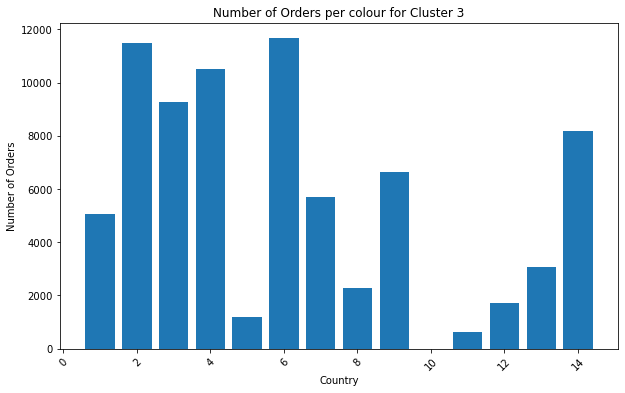

In [20]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter data for the current cluster (replace 0 with the desired cluster number)
cluster_data = predictions.filter(predictions['cluster'] == 0)

# Select the features you want to see
selected_features = cluster_data.select(
    col('order'), col('country'), col('price'), col('page 1 (main category)'), 
    col('colour'), col('location'), col('model photography')
)

# Show the selected features for the current cluster
selected_features.show()
# Group by country and count the number of orders
order_counts = selected_features.groupBy('colour').count().orderBy('count', ascending=False)

# Convert DataFrame to Pandas for plotting
order_counts_pd = order_counts.toPandas()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(order_counts_pd['colour'], order_counts_pd['count'])
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per colour for Cluster 3')
plt.xticks(rotation=45)
plt.show()


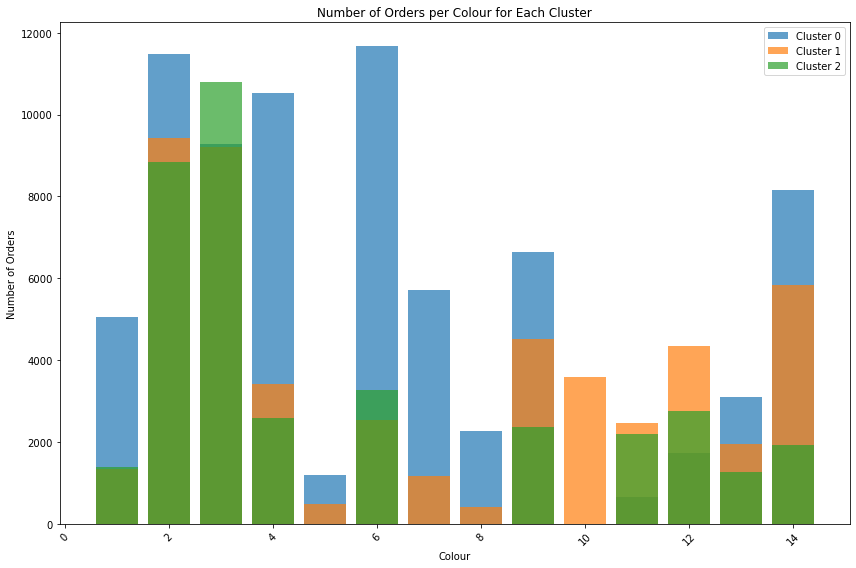

In [21]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters = 3

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Select the features you want to visualize
    selected_features = cluster_data.select(
        col('order'), col('country'), col('price'), col('page 1 (main category)'), 
        col('colour'), col('location'), col('model photography')
    )
    
    # Group by a categorical variable (e.g., 'colour') and count the number of occurrences
    order_counts = selected_features.groupBy('colour').count().orderBy('count', ascending=False)
    
    # Convert DataFrame to Pandas for plotting
    order_counts_pd = order_counts.toPandas()
    
    # Plot the bar plot for the current cluster
    plt.bar(order_counts_pd['colour'], order_counts_pd['count'], alpha=0.7, label=f'Cluster {cluster_num}')

# Add labels and legend
plt.xlabel('Colour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Colour for Each Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



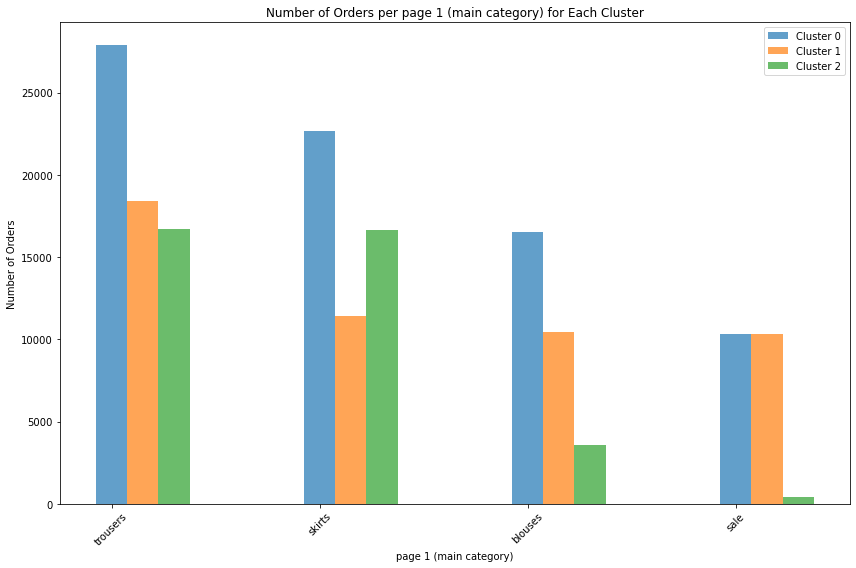

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters = 3
# Define the color categories
main_category = [
    "trousers", "skirts", "blouses", "sale"]

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Select the features you want to visualize
    selected_features = cluster_data.select(
        col('order'), col('country'), col('price'), col('page 1 (main category)'), 
        col('colour'), col('location'), col('model photography')
    )
    
    # Group by a categorical variable (e.g., 'colour') and count the number of occurrences
    order_counts = selected_features.groupBy('page 1 (main category)').count().orderBy('count', ascending=False)

    # Convert DataFrame to Pandas for plotting
    order_counts_pd = order_counts.toPandas()
    
    # Define the x positions for the bars, with a small offset for each cluster
    x_pos = np.arange(len(order_counts_pd['page 1 (main category)'])) + cluster_num * 0.15
    
    # Plot the bar plot for the current cluster
    plt.bar(x_pos, order_counts_pd['count'], width=0.15, alpha=0.7, label=f'Cluster {cluster_num}')

# Add labels and legend
plt.xlabel('page 1 (main category)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per page 1 (main category) for Each Cluster')
#plt.xticks(rotation=45)

# Set x-tick labels to include all colors
plt.xticks(np.arange(len(main_category)), main_category, rotation=45)

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


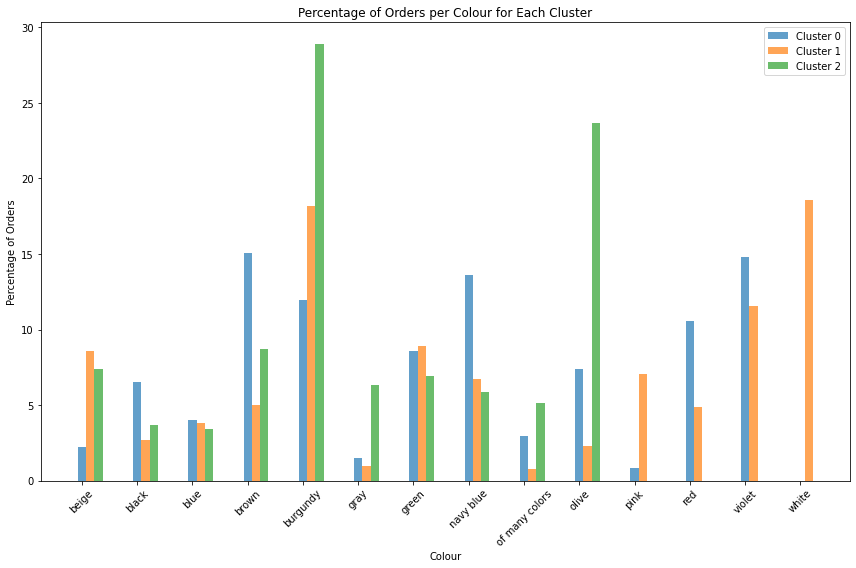

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters = 3
# Define the color categories
color_categories = [
    "beige", "black", "blue", "brown", "burgundy", "gray", "green", 
    "navy blue", "of many colors", "olive", "pink", "red", "violet", "white"
]

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Group by the 'colour' column and count occurrences of each color
    colour_counts = cluster_data.groupBy('colour').count()
    
    # Calculate the total count of data in the cluster
    total_count = cluster_data.count()
    
    # Calculate the percentage of each color based on the total count
    colour_counts_with_percentage = colour_counts.withColumn('percentage', (colour_counts['count'] / total_count) * 100)
    
    # Convert DataFrame to Pandas for plotting
    colour_counts_pd = colour_counts_with_percentage.toPandas()
    
    # Define the x positions for the bars, with a small offset for each cluster
    x_pos = np.arange(len(colour_counts_pd['colour'])) + cluster_num * 0.15
    
    # Plot the bar plot for the current cluster
    plt.bar(x_pos, colour_counts_pd['percentage'], width=0.15, alpha=0.7, label=f'Cluster {cluster_num}')

# Add labels and legend
plt.xlabel('Colour')
plt.ylabel('Percentage of Orders')
plt.title('Percentage of Orders per Colour for Each Cluster')
plt.xticks(np.arange(len(color_categories)), color_categories, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
pip install openpyxl


Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/home/notebook/.cache/pip/wheels/5e/a9/ad/06a316f488c0d57077212f2c62f35302bb1085f4c881b02eca'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


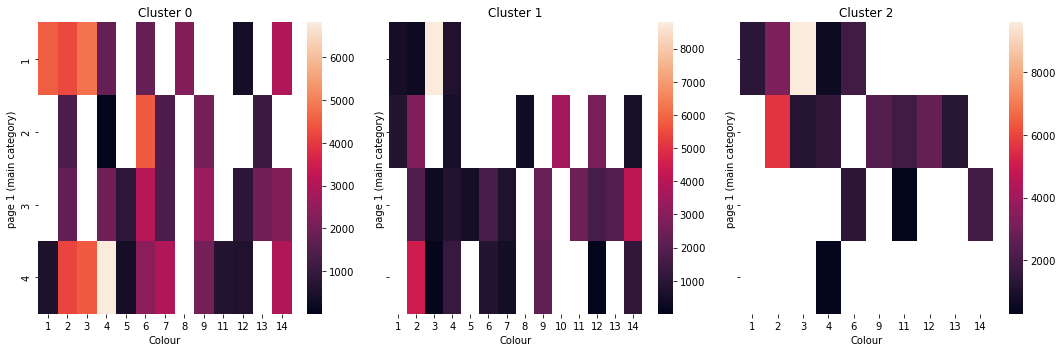

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters = 3

# Create a list to store the dataframes for each cluster
cluster_dfs = []

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Group by country and color and count the number of occurrences
    counts = cluster_data.groupBy('page 1 (main category)', 'colour').count().orderBy('count', ascending=False)
    
    # Convert to Pandas DataFrame
    counts_pd = counts.toPandas()
    
    # Append to the list
    cluster_dfs.append(counts_pd)

# Create subplots for each cluster
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), sharey=True)

# Loop through each cluster
for i, df in enumerate(cluster_dfs):
    ax = sns.heatmap(pd.pivot_table(df, values='count', index='page 1 (main category)', columns='colour'), ax=axes[i])
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Colour')
    ax.set_ylabel('page 1 (main category)')

plt.tight_layout()
plt.show()


Cluster 0 DataFrame:
     country  colour  count
0         29       6   9617
1         29       2   9387
2         29       4   9100
3         29       3   7867
4         29      14   6939
..       ...     ...    ...
352        3       8      1
353       30       7      1
354       19       8      1
355        2      13      1
356       25       8      1

[357 rows x 3 columns]
Cluster 1 DataFrame:
     country  colour  count
0         29       2   8096
1         29       3   6702
2         29      14   4778
3         29       9   3845
4         29      12   3346
..       ...     ...    ...
334       25      14      1
335       10      12      1
336        5       3      1
337       12      13      1
338       31       6      1

[339 rows x 3 columns]
Cluster 2 DataFrame:
     country  colour  count
0         29       3   7888
1         29       2   7110
2         29       6   2464
3         29      12   2365
4         29       9   1969
..       ...     ...    ...
245        5       3 

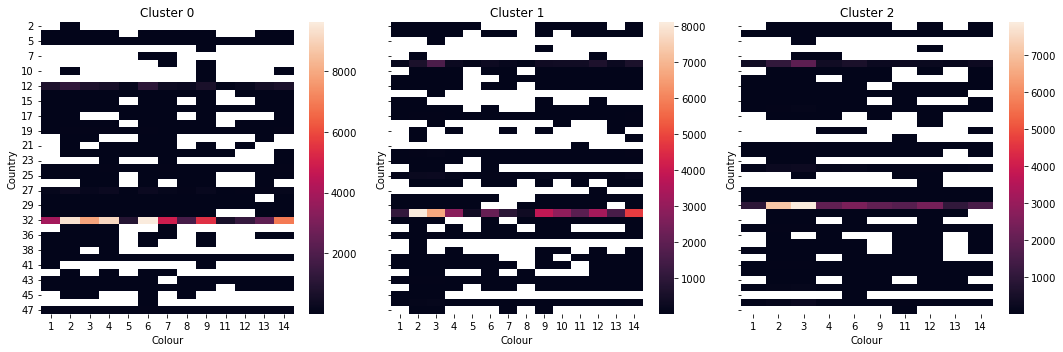

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters = 3

# Create a list to store the dataframes for each cluster
cluster_dfs = []

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Filter out rows where the country is Poland
    #cluster_data = cluster_data.filter(cluster_data['country'] != '29')
    # Filter out rows where the country is not
   # cluster_data = cluster_data.filter(~cluster_data['country'].isin(['40','25','2','32', '23', '14','43','17','18','39','19','36','20','7','47','45','30','6','5','35','33','1','26','13','8','40']))

    
    # Group by country and color and count the number of occurrences
    counts = cluster_data.groupBy('country', 'colour').count().orderBy('count', ascending=False)
    
    # Convert to Pandas DataFrame
    counts_pd = counts.toPandas()
    
    print(f"Cluster {cluster_num} DataFrame:")
    print(counts_pd)
    
    # Append to the list only if the DataFrame is not empty
    if not counts_pd.empty:
        cluster_dfs.append(counts_pd)
    else:
        print(f"No data available for Cluster {cluster_num}. Skipping...")

# Create subplots for each cluster
fig, axes = plt.subplots(1, len(cluster_dfs), figsize=(15, 5), sharey=True)

# Loop through each cluster DataFrame
for i, df in enumerate(cluster_dfs):
    print(f"Creating heatmap for Cluster {i}:")
    print(df)
    ax = sns.heatmap(pd.pivot_table(df, values='count', index='country', columns='colour'), ax=axes[i])
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Colour')
    ax.set_ylabel('Country')

plt.tight_layout()
plt.show()


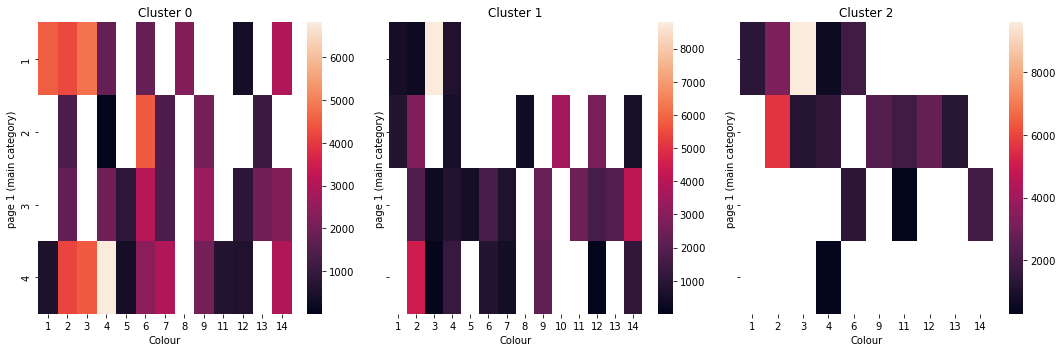

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters =3

# Create a list to store the dataframes for each cluster
cluster_dfs = []

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Group by country and color and count the number of occurrences
    counts = cluster_data.groupBy('page 1 (main category)', 'colour').count().orderBy('count', ascending=False)
    
    # Convert to Pandas DataFrame
    counts_pd = counts.toPandas()
    
    # Append to the list
    cluster_dfs.append(counts_pd)

# Create subplots for each cluster
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), sharey=True)

# Loop through each cluster
for i, df in enumerate(cluster_dfs):
    ax = sns.heatmap(pd.pivot_table(df, values='count', index='page 1 (main category)', columns='colour'), ax=axes[i])
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Colour')
    ax.set_ylabel('page 1 (main category)')

plt.tight_layout()
plt.show()


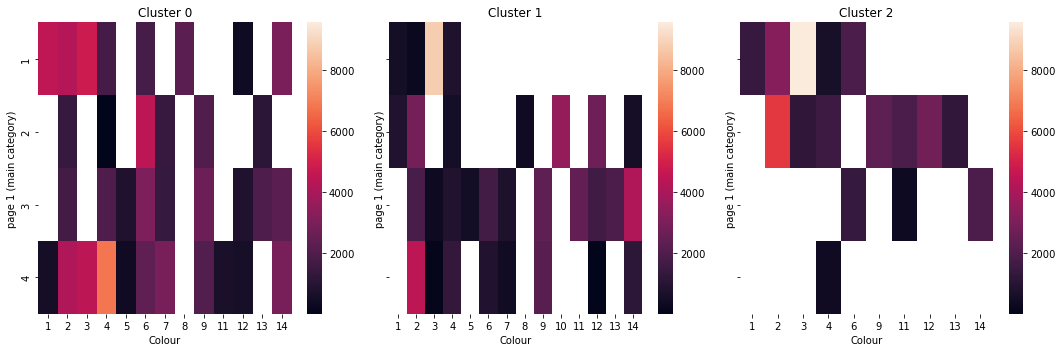

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Define the number of clusters
num_clusters = 3

# Create a list to store the dataframes for each cluster
cluster_dfs = []

# Loop through each cluster
for cluster_num in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = predictions.filter(predictions['cluster'] == cluster_num)
    
    # Group by country and color and count the number of occurrences
    counts = cluster_data.groupBy('page 1 (main category)', 'colour').count().orderBy('count', ascending=False)
    
    # Convert to Pandas DataFrame
    counts_pd = counts.toPandas()
    
    # Append to the list
    cluster_dfs.append(counts_pd)

# Calculate the overall minimum and maximum counts
overall_min = min(df['count'].min() for df in cluster_dfs)
overall_max = max(df['count'].max() for df in cluster_dfs)

# Create subplots for each cluster
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), sharey=True)

# Loop through each cluster
for i, df in enumerate(cluster_dfs):
    ax = sns.heatmap(pd.pivot_table(df, values='count', index='page 1 (main category)', columns='colour'), ax=axes[i], vmin=overall_min, vmax=overall_max)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Colour')
    ax.set_ylabel('page 1 (main category)')

plt.tight_layout()
plt.show()


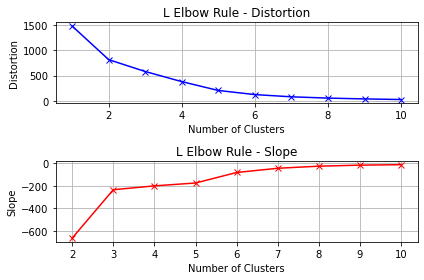

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def l_elbow_rule(data, max_k):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

    # Compute the slope of the distortion curve
    slopes = [distortions[i] - distortions[i-1] for i in range(1, len(distortions))]

    # Find the optimal number of clusters based on the slope
    optimal_k = slopes.index(max(slopes)) + 2  # Adding 2 because index starts from 0 and K starts from 1

    # Plot the distortion and slope
    plt.subplot(2, 1, 1)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.title('L Elbow Rule - Distortion')

    plt.subplot(2, 1, 2)
    plt.plot(range(2, max_k + 1), slopes, 'rx-')  # Corrected the range here
    plt.xlabel('Number of Clusters')
    plt.ylabel('Slope')
    plt.title('L Elbow Rule - Slope')

    plt.tight_layout()
    plt.grid(True)
    plt.show()

    return optimal_k

# Example usage:
# Assuming 'data' is your dataset
# You need to specify the maximum number of clusters to try
optimal_clusters = l_elbow_rule(df, max_k=10)


